In [1]:
from itertools import product
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

X = np.array([[0,0],[2,0],[4,0],[6,0],[8,0],[10,0],[12,0],[14,0],[16,0],[0,2],
                    [2,2],[4,2],[6,2],[8,2],[10,2],[12,2],[14,2],[16,2]])

y = np.array([-54,-60,-62,-64,-66,-68,-70,-72,-74,-60,-62,-64,-66,
                    -68,-70,-72,-74,-76])

# Input space
x1 = np.linspace(X[:,0].min(), X[:,0].max()) #p
x2 = np.linspace(X[:,1].min(), X[:,1].max()) #q
x = (np.array([x1, x2])).T

kernel = C(1.0, (1e-3, 1e3)) * RBF([5,5], (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=15)

gp.fit(X, y)

x1x2 = np.array(list(product(x1, x2)))
y_pred, MSE = gp.predict(x1x2, return_std=True)

X0p, X1p = x1x2[:,0].reshape(50,50), x1x2[:,1].reshape(50,50)
Zp = np.reshape(y_pred,(50,50))

# alternative way to generate equivalent X0p, X1p, Zp
# X0p, X1p = np.meshgrid(x1, x2)
# Zp = [gp.predict([(X0p[i, j], X1p[i, j]) for i in range(X0p.shape[0])]) for j in range(X0p.shape[1])]
# Zp = np.array(Zp).T

/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [6]:
np.stack(np.meshgrid(x1,x2), axis=2).reshape(-1,2).shape

(2500, 2)

In [1]:
from utils import *

In [3]:
ntk = NTK(depth=3, bias =0)

In [4]:
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)

x_grid, y_grid = np.meshgrid(x, y)

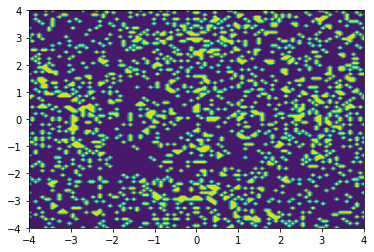

In [32]:
ntk = NTK(depth=3, bias=0)
out = []
for i in x: 
    for j in y:
        out.append(ntk(normalize(np.array([i, j]).reshape(1,-1))))

out = np.array(out).reshape(-1,100)
plt.contourf(x_grid, y_grid, out)

In [33]:
out

array([[0.99999998, 0.99999998, 0.99999998, ..., 0.99999998, 0.99999998,
        0.99999998],
       [0.99999998, 0.99999998, 0.99999998, ..., 0.99999998, 0.99999998,
        0.99999998],
       [0.99999998, 0.99999998, 0.99999998, ..., 0.99999998, 0.99999998,
        0.99999998],
       ...,
       [0.99999998, 0.99999998, 0.99999998, ..., 0.99999998, 0.99999998,
        0.99999998],
       [0.99999998, 0.99999998, 0.99999998, ..., 0.99999998, 0.99999998,
        0.99999998],
       [0.99999998, 0.99999998, 0.99999998, ..., 0.99999998, 0.99999998,
        0.99999998]])

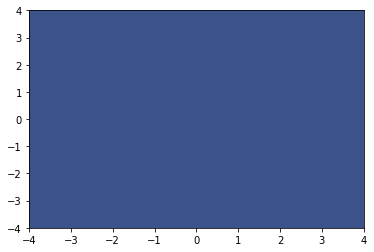

In [30]:
lpk = Matern(nu=0.5, length_scale=2.0)
out = []
for i in x: 
    for j in y:
        out.append(lpk(normalize(np.array([i, j]).reshape(1,-1))))

out = np.array(out).reshape(-1,100)
plt.contourf(x_grid, y_grid, out)

In [31]:
out

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [29]:
normalize(np.array([3,3]).reshape(1,-1))

array([[0.70710678, 0.70710678]])